In [26]:
'''
    对于简化版的CelebA这个数据集
    其中Annotation(标注)就是打好的标签
        identity表示做个题识别(某个人名)
            ---这就是个示例,不能用,因为数据集是阉割的
        Attributes表示属性识别(刘海,带不带眼镜等)
            ---由于有40个分类,因此每个图像下有40个属性,1表示符合该标签,-1表示不符合
    Eval表示评估用的标签
        它把20万张图片分类训练集,验证集和测试集

    Img文件夹中有两个子文件夹,分别表示经过预处理和未经预处理的图像
'''
import torchvision
import torchvision.transforms as transforms
import torch
import pandas as pd#读取csv文件
from skimage import io#读取图片
import os#读路径
import matplotlib.pyplot as plt


In [14]:
#读取一张图片
img_path='/data_disk/dyy/python_projects/bili_dif/data2/datasets4/picturestotensor/celebAsubset/Img/Img_celeba.7z/img_celeba/000001.jpg'
img01=io.imread(img_path)
print(img01.shape)
#实体转张量的类
toTensor=transforms.ToTensor()
img_tensor=toTensor(img01)
print(img_tensor.shape)

(687, 409, 3)
torch.Size([3, 687, 409])


In [15]:

#读取文件(标签文件)
identity_path='/data_disk/dyy/python_projects/bili_dif/data2/datasets4/picturestotensor/celebAsubset/Anno/identity_CelebA_1000.txt'
identity=pd.read_csv(header=None,
                     sep=' ',
                     filepath_or_buffer=identity_path)
print(identity.head())


            0     1
0  000001.jpg  2880
1  000002.jpg  2937
2  000003.jpg  8692
3  000004.jpg  5805
4  000005.jpg  9295


In [ ]:
#读取完csv文件之后,就可以用iloc方法读取其中的某一个元素,,iloc将整个表当成一个二维矩阵
print(identity.iloc[0,0])
img_dic=os.path.join(img_path,identity.iloc[0,0])
os.path.exists(img_dic)
img_0=io.imread(img_dic)
print(img_0.shape)
target=identity.iloc[0,1]
print(target)

000001.jpg
(687, 409, 3)
2880


#### 读取一张图片打包成Tensor的完整代码

(tensor([[[253, 231, 192],
         [253, 231, 192],
         [253, 231, 192],
         ...,
         [254, 244, 219],
         [254, 244, 219],
         [254, 244, 219]],

        [[253, 231, 192],
         [253, 231, 192],
         [253, 231, 192],
         ...,
         [254, 244, 219],
         [254, 244, 219],
         [254, 244, 219]],

        [[253, 231, 192],
         [253, 231, 192],
         [253, 231, 192],
         ...,
         [254, 244, 219],
         [254, 244, 219],
         [254, 244, 219]],

        ...,

        [[253, 218, 176],
         [253, 218, 176],
         [253, 218, 176],
         ...,
         [243, 173, 122],
         [234, 170, 122],
         [239, 178, 131]],

        [[253, 218, 176],
         [253, 218, 176],
         [253, 218, 176],
         ...,
         [251, 180, 126],
         [237, 174, 123],
         [238, 178, 128]],

        [[253, 218, 176],
         [253, 218, 176],
         [253, 218, 176],
         ...,
         [255, 184, 128],
       

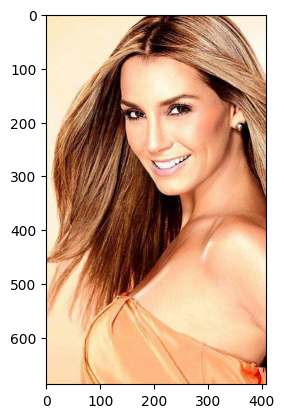

In [32]:
idx=0
img_path=r'/data_disk/dyy/python_projects/bili_dif/data2/datasets4/picturestotensor/celebAsubset/Img/Img_celeba.7z/img_celeba'
csv_path=r'/data_disk/dyy/python_projects/bili_dif/data2/datasets4/picturestotensor/celebAsubset/Anno/list_attr_celeba.txt'

img_dic=os.path.join(img_path,identity.iloc[idx,0])#图像目录
img=io.imread(img_dic)#索引为0的图像的像素矩阵
lable=identity.iloc[idx,1]
sample=(torch.tensor(img),int(lable))
print(sample)
plt.imshow(img)